# Exercice 1
## Programmation d’une méthode de discrimination : Kppv

In [22]:
import pandas as pd
import scipy.io as sp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imutils import paths

In [23]:
def kppv(apprent, classe_origine, k, x):
    clas = []
    N1 = len(apprent[0])
    N2 = len(x[0])
     

    # parcourir les individus à classer
    for i in range (N2):
        # position de l'individu
        posIndividu = np.array(x[:,i])
        # tableau de distance entre l'individu et tous l'apprentissage
        dists_apprents = []
        # calculer la distance avec tous les individus de l'apprentissage
        for j in range (N1):
            # position du voisin j
            posAppr = np.array(apprent[:,j])
            # classe du voisin j
            classAppr = classe_origine[j]
            # distance entre l'individu le voisin j
            dist = np.linalg.norm(posIndividu - posAppr)
            obj = [dist, classAppr]
            # ajout de la distance et la classe au tableau
            dists_apprents.append(obj)
                    
        # tri du tableau des distance
        dists_apprents = sorted(dists_apprents, key=lambda o: o[0])
        #print(dists_apprents)

        # tableau des k plus proches voisins
        kNearest = [o[1] for o in dists_apprents[:k]]
        clas.append(max(kNearest, key = kNearest.count))
        
    return clas

In [24]:
def calcTauxErreur(x, y):
    return np.mean(x != y) * 100

def affiche_classe(k, tab1, tab2 = None, legend1 = "KNN", legend2 = "Bayes"):
    # afficher le graph des résultats de la classification bayesienne et knn
    plt.plot(k, tab1, '-o')
    if tab2 != None:
        plt.plot(k, tab2, '-o')
    plt.legend([legend1, legend2])
    plt.show()
    

k =  1 taux d'erreur =  6.0 %
k =  3 taux d'erreur =  4.333333333333334 %
k =  5 taux d'erreur =  3.3333333333333335 %
k =  7 taux d'erreur =  2.666666666666667 %
k =  13 taux d'erreur =  2.0 %
k =  15 taux d'erreur =  2.666666666666667 %


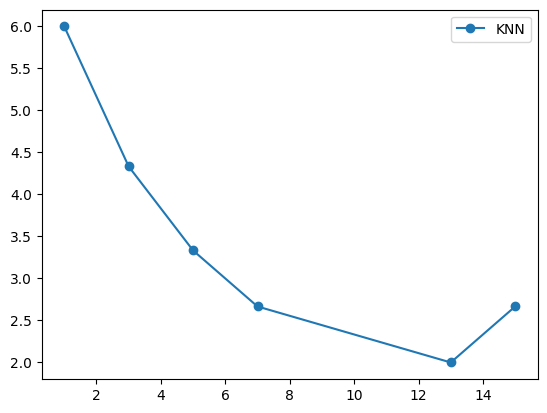

In [25]:
Data = sp.loadmat("../data/p1_test.mat")
classes = [1]*50 + [2]*50 + [3]*50
k = [1, 3, 5, 7, 13, 15]
tauxErreur = []

for i in k:
    clas = kppv(Data["test"], classes, i, Data["x"])
    error = calcTauxErreur(clas, Data["clasapp"])
    print("k = ", i, "taux d'erreur = ", error , "%")
    tauxErreur.append(error)

affiche_classe(k, tauxErreur)


# Exercice 2
## Comparaison des deux méthodes (param ́etriques et non param ́etriques)

### 2.1 Influence de la taille de l’ensemble d’apprentissage : taille réduite

In [26]:
# UTIL
def readExcel(fileName):
    # load data
    apprent = pd.read_excel('../data/' + fileName + '.xlsx', sheet_name='Ensemble Apprentissage')
    x = pd.read_excel('../data/' + fileName + '.xlsx', sheet_name='Inconnu')

    # remove column 0
    apprent = apprent.drop(columns=['Unnamed: 0'])
    x = x.drop(columns=['Unnamed: 0'])

    # transpose
    apprent = apprent.T
    x = x.T

    # oracle
    oracle = x[2]

    # remove column 2 
    x = x.drop(columns=[2])

    return apprent, x, oracle

In [27]:
#Naive Bayes
def naive_bayes(apprent, classe_origine, x):
    # Create a Gaussian Classifier
    model = GaussianNB()
    # Train the model using the training sets
    model.fit(apprent, classe_origine)
    # Predict Output
    return model.predict(x)

# KNN
def knn(apprent, classe_origine, k, x):
    # Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the data
    knn.fit(apprent, classe_origine)
    # Predict Output
    return knn.predict(x)

k =  1 taux d'erreur =  3.6666666666666665 %
k =  3 taux d'erreur =  3.0 %
k =  5 taux d'erreur =  2.3333333333333335 %
k =  7 taux d'erreur =  2.666666666666667 %
k =  13 taux d'erreur =  3.6666666666666665 %
k =  15 taux d'erreur =  3.6666666666666665 %


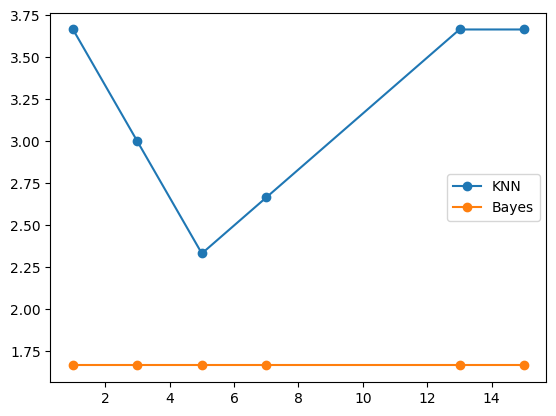

In [28]:
classes = [0]*20 + [1]*20 + [2]*20
k = [1, 3, 5, 7, 13, 15]
p1_petit_apprent, p1_petit_x, p1_petit_oracle = readExcel("p1_petit")

# for KNN
knnErrors = []
for i in k:
    res_knn = knn(p1_petit_apprent, classes, i, p1_petit_x)
    error = calcTauxErreur(res_knn, p1_petit_oracle)
    print("k = ", i, "taux d'erreur = ", error , "%")
    knnErrors.append(error)

# for Bayes
res_bayes = naive_bayes(p1_petit_apprent, classes, p1_petit_x)
bayesErrors = [calcTauxErreur(res_bayes, p1_petit_oracle)]*len(k)

affiche_classe(k, knnErrors, bayesErrors)


### 2.2 Influence de la taille de l’ensemble d’apprentissage : taille importante

k =  1 taux d'erreur =  2.0 %
k =  3 taux d'erreur =  1.6666666666666667 %
k =  5 taux d'erreur =  1.3333333333333335 %
k =  7 taux d'erreur =  1.0 %
k =  13 taux d'erreur =  1.6666666666666667 %
k =  15 taux d'erreur =  1.3333333333333335 %


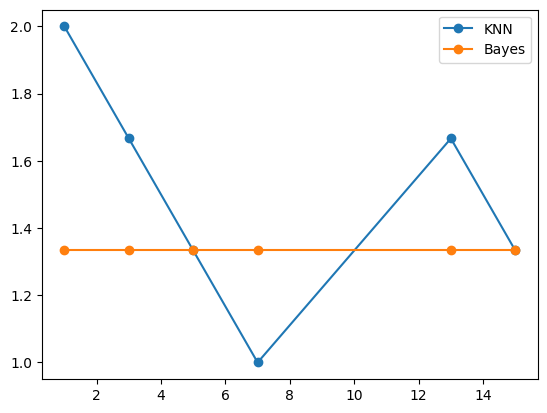

In [29]:
classes = [0]*150 + [1]*150 + [2]*150
k = [1, 3, 5, 7, 13, 15]

p1_grand_apprent, p1_grand_x, p1_grand_oracle = readExcel("p1_grand")

# for KNN
knnErrors = []
for i in k:
    res_knn = knn(p1_grand_apprent, classes, i, p1_grand_x)
    error = calcTauxErreur(res_knn, p1_grand_oracle)
    print("k = ", i, "taux d'erreur = ", error , "%")
    knnErrors.append(error)

# for Bayes
res_bayes = naive_bayes(p1_grand_apprent, classes, p1_grand_x)
bayesErrors = [calcTauxErreur(res_bayes, p1_grand_oracle)]*len(k)

affiche_classe(k, knnErrors, bayesErrors)

### 2.3 Absence de professeur

k =  1 taux d'erreur =  6.666666666666667 %
k =  3 taux d'erreur =  6.0 %
k =  5 taux d'erreur =  5.0 %
k =  7 taux d'erreur =  5.0 %
k =  13 taux d'erreur =  5.333333333333334 %
k =  15 taux d'erreur =  5.666666666666666 %


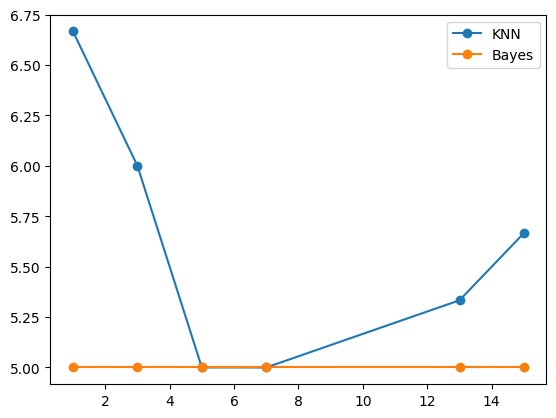

In [30]:
k = [1, 3, 5, 7, 13, 15]

p1_kmean_apprent, p1_kmean_x, p1_kmean_oracle = readExcel("p1_Kmean")
classes = p1_kmean_apprent[2]
p1_kmean_apprent = p1_kmean_apprent.drop(columns=[2])

# for KNN
knnErrors = []
for i in k:
    res_knn = knn(p1_kmean_apprent, classes, i, p1_kmean_x)
    error = calcTauxErreur(res_knn, p1_kmean_oracle)
    print("k = ", i, "taux d'erreur = ", error , "%")
    knnErrors.append(error)

# for Bayes
res_bayes = naive_bayes(p1_kmean_apprent, classes, p1_kmean_x)
bayesErrors = [calcTauxErreur(res_bayes, p1_kmean_oracle)]*len(k)

affiche_classe(k, knnErrors, bayesErrors)

### 2.4 Distribution inconnue

k =  1 taux d'erreur =  1.6666666666666667 %
k =  3 taux d'erreur =  1.6666666666666667 %
k =  5 taux d'erreur =  1.6666666666666667 %
k =  7 taux d'erreur =  1.0 %
k =  13 taux d'erreur =  3.0 %
k =  15 taux d'erreur =  2.0 %


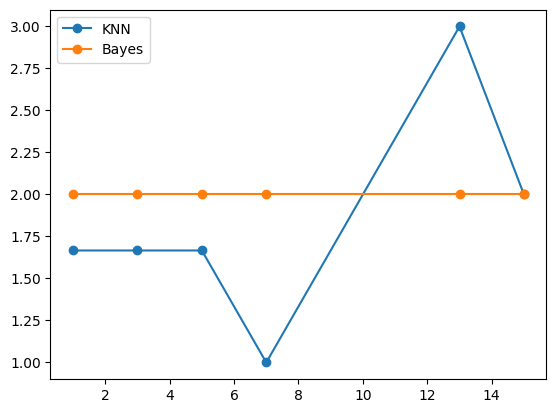

In [31]:
k = [1, 3, 5, 7, 13, 15]

p1_nonGaussien_apprent, p1_nonGaussien_x, p1_kmean_oracle = readExcel("p1_NonGaussien")
classes = p1_nonGaussien_apprent[2]
p1_nonGaussien_apprent = p1_nonGaussien_apprent.drop(columns=[2])

# for KNN
knnErrors = []
for i in k:
    res_knn = knn(p1_nonGaussien_apprent, classes, i, p1_nonGaussien_x)
    error = calcTauxErreur(res_knn, p1_kmean_oracle)
    print("k = ", i, "taux d'erreur = ", error , "%")
    knnErrors.append(error)

# for Bayes
res_bayes = naive_bayes(p1_nonGaussien_apprent, classes, p1_nonGaussien_x)
bayesErrors = [calcTauxErreur(res_bayes, p1_kmean_oracle)]*len(k)

affiche_classe(k, knnErrors, bayesErrors)

# Exercice 3
## Classification d'images
### 3.1 Calcul des descripteurs

In [32]:
X = (pd.read_excel('../data/WangSignatures.xls',sheet_name=0,index_col = 0,header=None))
Mesure=X.values

X = (pd.read_excel('../data/WangSignatures.xls',sheet_name=1,index_col = 0,header=None))
Data=X.values
Mesure=np.concatenate((Mesure,Data),axis=1)

X = (pd.read_excel('../data/WangSignatures.xls',sheet_name=2,index_col = 0,header=None))
Data=X.values

Mesure=np.concatenate((Mesure,Data),axis=1)
X = (pd.read_excel('../data/WangSignatures.xls',sheet_name=3,index_col = 0,header=None))
Data=X.values
Mesure=np.concatenate((Mesure,Data),axis=1)

X = (pd.read_excel('../data/WangSignatures.xls',sheet_name=4,index_col = 0,header=None))
Data=X.values
Mesure=np.concatenate((Mesure,Data),axis=1)

label = [0]*100 + [1]*100 + [2]*100 + [3]*100 + [4]*100 + [5]*100 + [6]*100 + [7]*100 + [8]*100 + [9]*100

### 3.2 Mise en place d'un système de classification

In [33]:
# images array
imagePaths = list(paths.list_images("../data/Wang"))
X = []

for imagePath in imagePaths:
    name = imagePath.replace("../data/Wang\\", "")
    image = mpimg.imread(imagePath)
    tmp = image[0:256, 0:256]
    X.append(tmp)

# dimImage = X[0].shape
X = np.array(X)

In [47]:
# split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(Mesure, label, test_size=0.2, random_state=2, stratify=label)

# use KNN
k = [1, 3, 5, 7, 13, 15]
for i in k:
    # create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the classifier to the data
    knn.fit(X_train, Y_train)
    # predict
    knn_res = knn.predict(X_test)

    # calculate accuracy of class predictions
    print("k = ", i, "taux d'erreur = ", calcTauxErreur(knn_res, Y_test) , "%")

# use Bayes
#Create a Gaussian Classifier
bayes = GaussianNB()
# Train the model using the training sets
bayes.fit(X_train,Y_train)
# Predict 
bayes_res = bayes.predict(X_test)
print("bayes taux d'erreur = ", calcTauxErreur(bayes_res, Y_test) , "%")

# confusion matrix
knn_cm = confusion_matrix(Y_test, knn_res)
print(knn_cm)
bayes_cm = confusion_matrix(Y_test, bayes_res)
print(bayes_cm)

Pe_knn=(1-np.trace(knn_cm)/len(Y_test))
print('Knn :',Pe_knn)

Pe_bayes=(1-np.trace(bayes_cm)/len(Y_test))
print('Bayes :',Pe_bayes)



k =  1 taux d'erreur =  53.5 %
k =  3 taux d'erreur =  53.0 %
k =  5 taux d'erreur =  51.0 %
k =  7 taux d'erreur =  55.00000000000001 %
k =  13 taux d'erreur =  53.0 %
k =  15 taux d'erreur =  53.0 %
bayes taux d'erreur =  55.50000000000001 %
[[12  1  3  0  1  1  0  0  2  0]
 [ 2  8  5  0  0  1  2  0  2  0]
 [ 0  3 15  0  1  1  0  0  0  0]
 [ 1  0  5  8  5  0  0  0  1  0]
 [ 1  1  0  4  9  1  1  0  1  2]
 [ 3  1  1  0  5  4  5  0  0  1]
 [ 0  3  0  0  0  6  6  4  0  1]
 [ 3  0  1  0  0  0  0 11  3  2]
 [ 1  1  9  0  0  1  1  0  5  2]
 [ 0  1  1  0  1  0  1  0  0 16]]
[[ 9  7  0  1  0  0  0  0  3  0]
 [ 0 16  0  2  0  0  0  0  0  2]
 [ 1 10  6  1  0  1  0  0  1  0]
 [ 0  1  6 11  1  0  0  1  0  0]
 [ 0  1  0  7  1  3  0  1  0  7]
 [ 1  5  0  1  1  1  3  0  1  7]
 [ 0  0  0  1  0  1 12  2  0  4]
 [ 1  1  0  0  0  0  1 11  4  2]
 [ 2  5  0  1  1  1  0  0  7  3]
 [ 1  1  0  0  1  1  1  0  0 15]]
Knn : 0.53
Bayes : 0.5549999999999999
